In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.layers import Input, Dense
from keras.utils import to_categorical
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16
from numpy import argmax

In [5]:
PATH = "/content/drive/MyDrive/eyediseases/Training"
data_dir_list = os.listdir(PATH)
data_dir_list

['Glaucoma', 'Cataracts', 'Uveitis', 'Crossed_Eyes', 'Bulging_eyes']

In [6]:
img_rows=224
img_cols=224
num_channel=3

num_epoch = 50
batch_size = 2

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Glaucoma folder
Getting image from Cataracts folder
Getting image from Uveitis folder
Getting image from Crossed_Eyes folder
Getting image from Bulging_eyes folder


In [7]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

num_classes 5
Shape of image data (383, 224, 224, 3)


In [8]:
num_of_samples

383

In [9]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4])

In [10]:
target_column

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define your model
first_Mod = Sequential([
    Flatten(input_shape=(input_shape)),  # Assuming input_shape is defined elsewhere
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
first_Mod.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model
first_Mod.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 19,268,357
Trainable params: 19,268,357
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = first_Mod.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = first_Mod.evaluate(X_test,y_test,batch_size=batch_size)

Epoch 1/50
134/134 [==============================] - 3s 10ms/step - loss: 55.3167 - accuracy: 0.2948 - val_loss: 26.5673 - val_accuracy: 0.2000
Epoch 2/50
134/134 [==============================] - 1s 8ms/step - loss: 22.8983 - accuracy: 0.3545 - val_loss: 9.8665 - val_accuracy: 0.5000
Epoch 3/50
134/134 [==============================] - 1s 8ms/step - loss: 8.5147 - accuracy: 0.4254 - val_loss: 6.5887 - val_accuracy: 0.4625
Epoch 4/50
134/134 [==============================] - 1s 8ms/step - loss: 2.2102 - accuracy: 0.3918 - val_loss: 1.8275 - val_accuracy: 0.4750
Epoch 5/50
134/134 [==============================] - 1s 8ms/step - loss: 1.3785 - accuracy: 0.4291 - val_loss: 1.6264 - val_accuracy: 0.0875
Epoch 6/50
134/134 [==============================] - 2s 12ms/step - loss: 1.5528 - accuracy: 0.4440 - val_loss: 1.6004 - val_accuracy: 0.4750
Epoch 7/50
134/134 [==============================] - 1s 9ms/step - loss: 1.5189 - accuracy: 0.4664 - val_loss: 1.6035 - val_accuracy: 0.4875
E

In [14]:
print("Loss of the model is - " , first_Mod.evaluate(X_temp,y_temp)[0])
print("Accuracy of the model is - " , first_Mod.evaluate(X_temp,y_temp)[1]*100 , "%")

4/4 [==============================] - 0s 9ms/step - loss: 1.3641 - accuracy: 0.4957
Loss of the model is -  1.3640791177749634
4/4 [==============================] - 0s 10ms/step - loss: 1.3641 - accuracy: 0.4957
Accuracy of the model is -  49.56521689891815 %


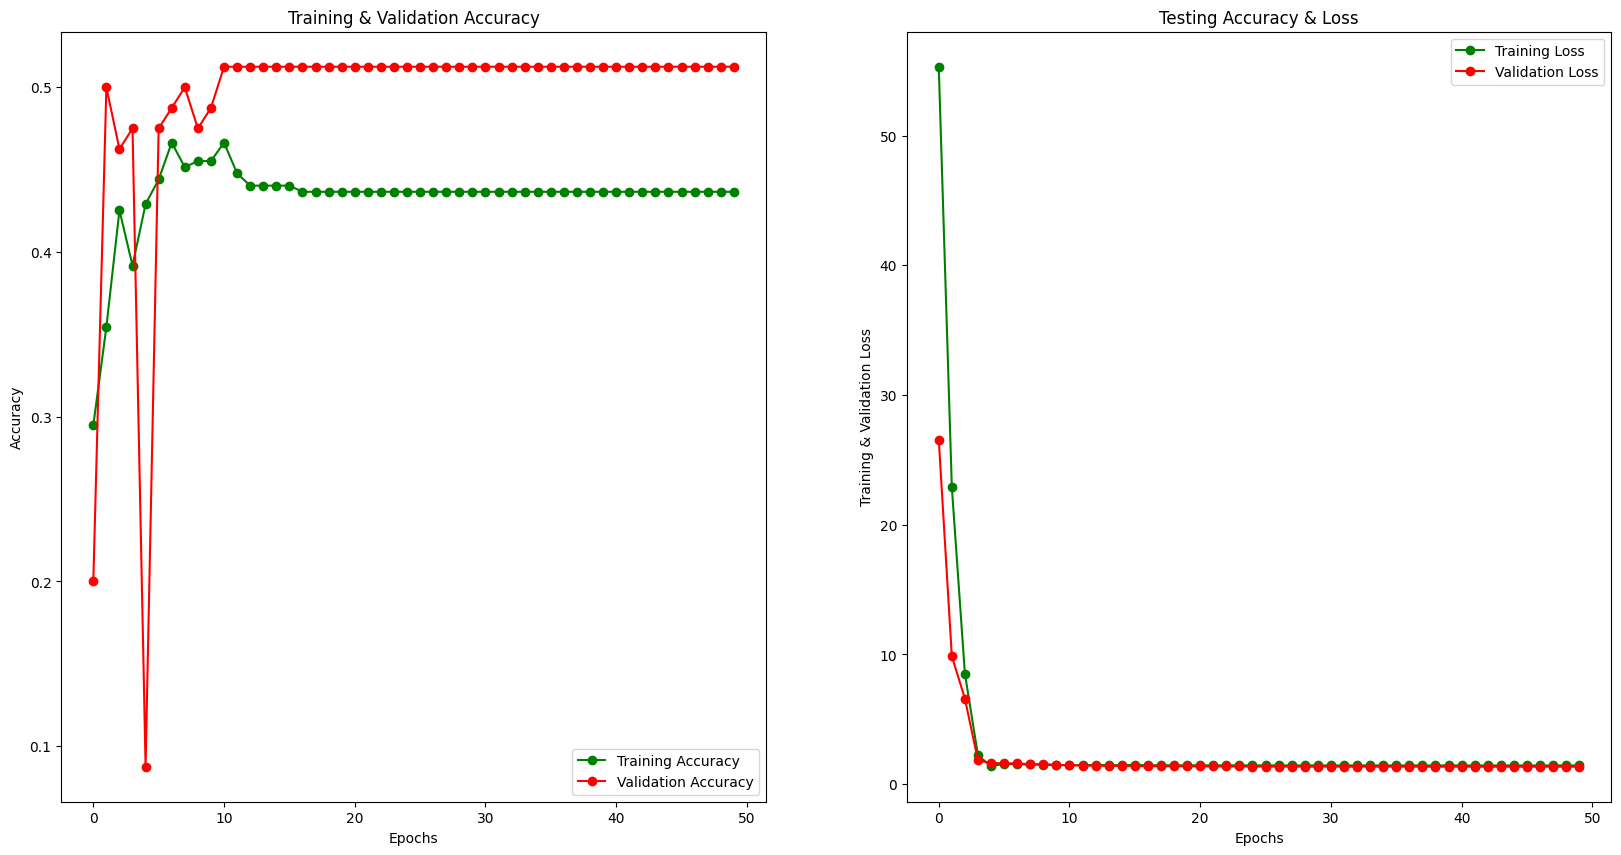

In [15]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [16]:
predictions = first_Mod.predict(X_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

3/3 [==============================] - 0s 7ms/step


array([0.08150405, 0.13805042, 0.43610144, 0.20692126, 0.13742283,
       0.08150405, 0.13805042, 0.43610144, 0.20692126, 0.13742283,
       0.08150405, 0.13805042, 0.43610144, 0.20692126, 0.13742283],
      dtype=float32)

In [17]:
from keras.models import Model
first_Mod.save('/content/drive/MyDrive/mod2/first_Mod.keras')